# import data

In [2]:
#https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [4]:
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)
 
#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)
 
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)
print(data.columns)

[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   55.041828  51970000
2020-04-02   55.000000   56.138500  ...   55.787476  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.774338  33086200
2023-03-31  101.300003  103.889999  ...  103.611092  36863400

[756 rows x 6 columns]
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# Data Processing

### Train Test Split

In [5]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
 
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(605, 1) (151, 1)


### reshape numpy array train set

In [6]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
# print(dataset_train)

# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape
# out1 = dataset_train[0]
# out2 = dataset_train[0,0]
# out3 = dataset_train[:10]
# print(out3)

(605, 1)

### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


### reshape numpy array test set

In [8]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


### Train Set X, y split

In [9]:
#similar to lags feature 

X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0]) #lags feature 50 lags
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train) #list
        print(y_train)
        print()

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

In [10]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

### reshape X,y train set 

In [13]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (555, 50, 1) y_train : (555, 1)
[[[0.01246754]
  [0.        ]
  [0.00764156]
  [0.01714287]
  [0.0607844 ]
  [0.05355843]
  [0.06139221]
  [0.05272728]
  [0.0727117 ]
  [0.0761091 ]
  [0.08682596]
  [0.0943896 ]
  [0.08825454]
  [0.07413508]
  [0.0733039 ]
  [0.08609869]
  [0.08051948]
  [0.09974024]
  [0.09516887]
  [0.12727273]
  [0.12018702]
  [0.11641037]
  [0.1081195 ]
  [0.12337662]
  [0.13402599]
  [0.13574544]
  [0.14640004]
  [0.14378702]
  [0.16011432]
  [0.14345973]
  [0.12130912]
  [0.12896625]
  [0.13588574]
  [0.14830132]
  [0.15021299]
  [0.16155324]
  [0.15787013]
  [0.17764155]
  [0.16623377]
  [0.15584416]
  [0.16645714]
  [0.16919484]
  [0.17402597]
  [0.178026  ]
  [0.17495062]
  [0.16396881]
  [0.16949613]
  [0.17934547]
  [0.18779741]
  [0.17715843]]

 [[0.        ]
  [0.00764156]
  [0.01714287]
  [0.0607844 ]
  [0.05355843]
  [0.06139221]
  [0.05272728]
  [0.0727117 ]
  [0.0761091 ]
  [0.08682596]
  [0.0943896 ]
  [0.08825454]
  [0.07413508]
  [0.073303

In this step, the data is converted into a format that is suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, which was originally a ***2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features)***, where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step. 

### reshape X,y test set

In [11]:

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (101, 50, 1) y_test : (101, 1)


# Modeling

In [12]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

### simple RNN model

In [13]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add( SimpleRNN(units = 50))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20


d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0245
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0031
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0030
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0028
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0025
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0023
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0022
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0023
Epoch 9/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0024
Epoch 10/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0019
Epoch 11/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0019
Epoch 12/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0017
Epoch 13/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019
Epoch 14/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0018
Epoch 15/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

### model LSTM RNN Model

In [14]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(Dense(25))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 5.3420e-04 - loss: 0.0210
Epoch 2/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0011 - loss: 0.0025
Epoch 3/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 2.4549e-04 - loss: 0.0019
Epoch 4/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0013 - loss: 0.0017
Epoch 5/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0018 - loss: 0.0015
Epoch 6/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 5.2119e-04 - loss: 0.0013
Epoch 7/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0023 - loss: 0.0012
Epoch 8/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0037 - loss: 0.0015
Epoch 9/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0035 - loss: 9.3856e-04
Epoch 10/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0030 - loss: 0.0011
Epoch 11/12
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0309e-04 - loss: 7.0956e-04
Epoch 12/12
555/555 ━━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

### GRU RNN Model

In [15]:
#Initialising the model
regressorGRU = Sequential()
 
# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     activation='tanh'))
 
# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
 
# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20


d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


555/555 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0607
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0038
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0032
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0025
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0027
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0026
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0023
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0027
Epoch 9/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0021
Epoch 10/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0020
Epoch 11/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0030
Epoch 12/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0020
Epoch 13/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0019
Epoch 14/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.0027
Epoch 15/20
555/555 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

# Prediction

In [20]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [21]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

### Visualization

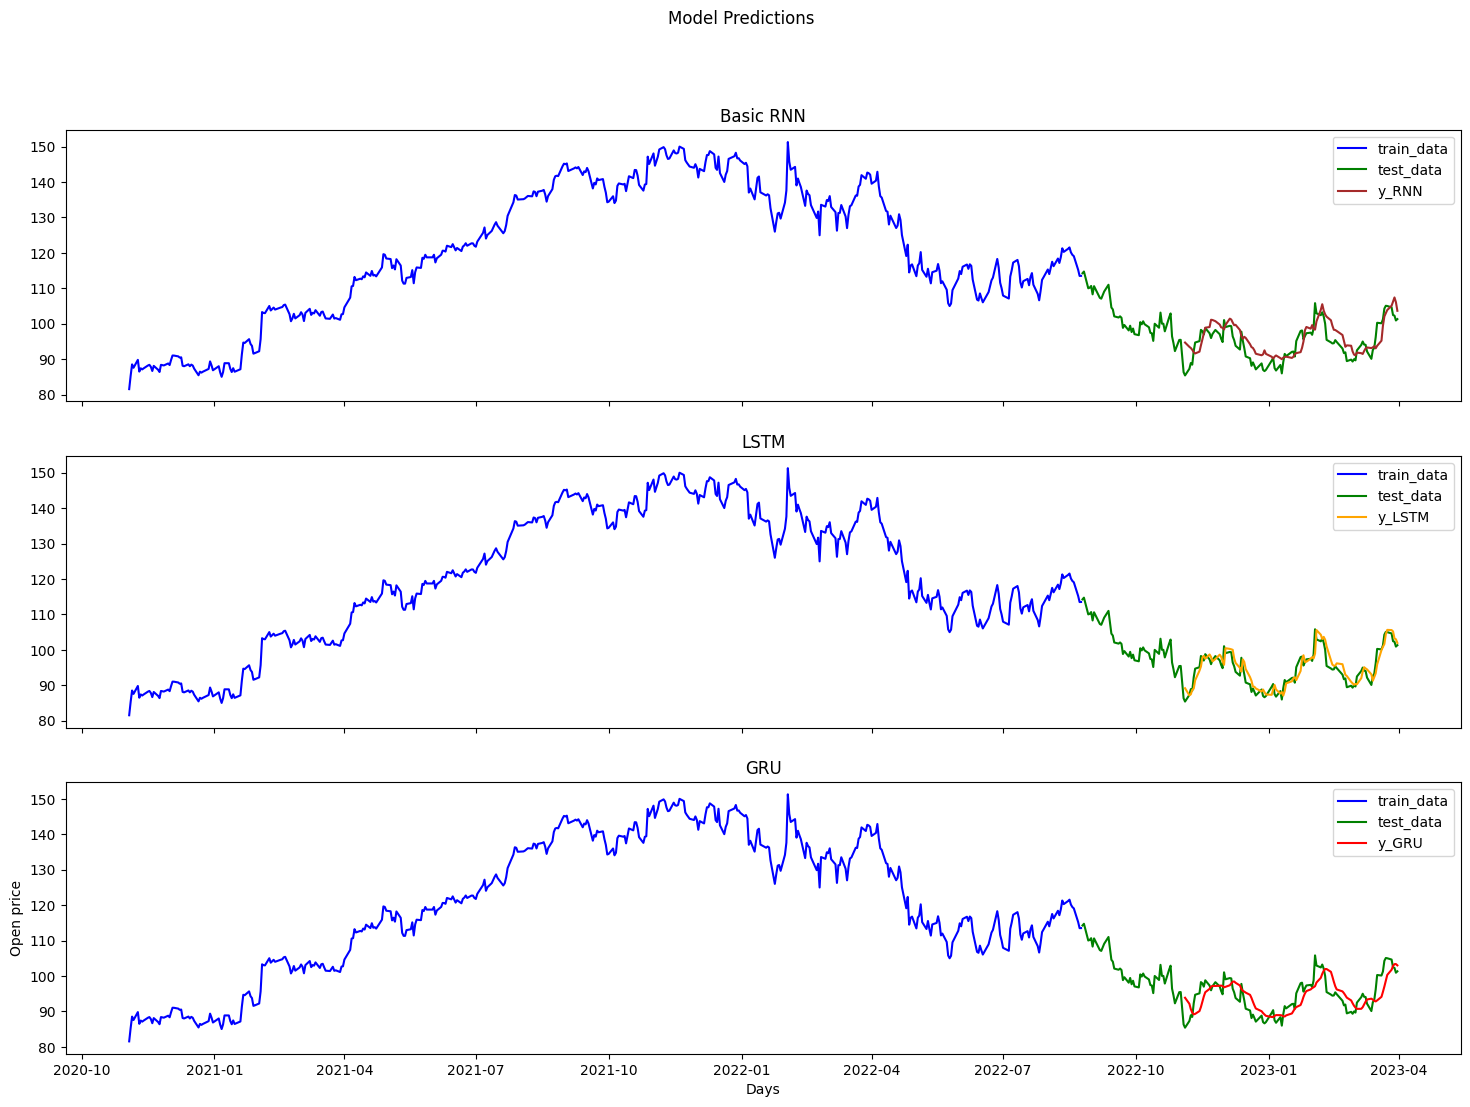

In [22]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b") # train_data
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g") # test_data
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown") #y_RNN_O => y_test
axs[0].legend()
axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()

In [34]:
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             mean_absolute_percentage_error)
from math import sqrt


pred_dict = {"RNN":y_RNN_O,"LSTM":y_LSTM_O, "GRU":y_GRU_O}
y_true = test_data[50:].Open
print(y_true)

for name, pred in pred_dict.items():
    mae = mean_absolute_error(y_true, pred)
    mse = mean_squared_error(y_true,pred)
    rmse = math.sqrt(mse)
    mape =mean_absolute_percentage_error(y_true,pred)
    print(f"==== {name} ====")
    print(f"MAE: {mae}")
    print(f"MSE {mse}")
    print(f"RMSE {rmse}")
    print(f"MAPE: {mape}\n")
# print(RNN_mae)

Date
2022-11-04     85.400002
2022-11-07     87.279999
                 ...    
2023-03-30    100.910004
2023-03-31    101.300003
Name: Open, Length: 101, dtype: float64
==== RNN ====
MAE: 2.9845427711411276
MSE 12.403892900953231
RMSE 3.5219160837466346
MAPE: 0.03178409161471721

==== LSTM ====
MAE: 1.810503364789604
MSE 4.955549957079693
RMSE 2.226106456816406
MAPE: 0.019125918600890815

==== GRU ====
MAE: 2.938192915208269
MSE 12.473869285945629
RMSE 3.5318365316001854
MAPE: 0.030939837613624645



In [23]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')

model = regressor.save('regressorRNN.keras')
model = regressorLSTM.save('regressorLSTM.keras')
model = regressorGRU.save('regressorGRU.keras')